### 1. Importing Libraries and Data preprocessing

In [1]:
%pip install numpy pandas matplotlib tqdm scikit-learn tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# set seed
seed = 42

In [16]:
import os

# Provide the absolute path to the CSV file
csv_path = r'D:\AI-ML BLACKBELT COURSE\FUNDAMENTS OF DEEP LEARNING\Course_Handouts_Fundamentals_of_Deep_Learning\NN\Neuralnetworkandhyperparametertuninginkeras-200330-192024\Neural network and hyperparameter tuning in keras\Dataset\Dataset\emergency_classification.csv'

# Check if the CSV exists
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"❌ File not found: '{csv_path}'. Please verify the path and try again.")
else:
    print(f"✅ Found: '{csv_path}'")


✅ Found: 'D:\AI-ML BLACKBELT COURSE\FUNDAMENTS OF DEEP LEARNING\Course_Handouts_Fundamentals_of_Deep_Learning\NN\Neuralnetworkandhyperparametertuninginkeras-200330-192024\Neural network and hyperparameter tuning in keras\Dataset\Dataset\emergency_classification.csv'


In [17]:
import pandas as pd

# Load the CSV into a DataFrame
data = pd.read_csv(csv_path)

# Preview the dataset
print("📊 Dataset Preview:")
print(data.head())


📊 Dataset Preview:
  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [18]:
# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst few rows of the dataset:")
print(data.head())
print("\nData Info:")
data.info()
print("\nClass distribution:")
print(data['emergency_or_not'].value_counts())

Dataset Shape: (2352, 2)

First few rows of the dataset:
  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       2352 non-null   object
 1   emergency_or_not  2352 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.9+ KB

Class distribution:
emergency_or_not
0    1361
1     991
Name: count, dtype: int64


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Correct full path to your image directory
image_dir = r'D:\AI-ML BLACKBELT COURSE\FUNDAMENTS OF DEEP LEARNING\Course_Handouts_Fundamentals_of_Deep_Learning\NN\Neuralnetworkandhyperparametertuninginkeras-200330-192024\Neural network and hyperparameter tuning in keras\Dataset\Dataset\images'

# Initialize list to hold image data
X = []
missing_files = []

# Load and normalize each image
for img_name in data.image_names:
    img_path = os.path.join(image_dir, img_name)
    
    try:
        img = plt.imread(img_path) / 255.0
        X.append(img)
    except FileNotFoundError:
        print(f"❌ Missing file: {img_path}")
        missing_files.append(img_path)

# Convert to NumPy array
X = np.array(X)

# Target labels
y = data.emergency_or_not.values

# Summary
print(f"\n✅ Loaded {len(X)} images successfully.")
if missing_files:
    print(f"⚠️ {len(missing_files)} images were missing and skipped.")




✅ Loaded 2352 images successfully.


In [22]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, 
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [26]:
image_augmentation.fit(X_train)

### 2. Model Building

In [27]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [29]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [30]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 558ms/step - accuracy: 0.5140 - loss: 1.0329 - val_accuracy: 0.4391 - val_loss: 0.9770
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.5626 - loss: 0.9472 - val_accuracy: 0.4391 - val_loss: 0.9741
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 528ms/step - accuracy: 0.5398 - loss: 0.9123 - val_accuracy: 0.4391 - val_loss: 0.9850
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 526ms/step - accuracy: 0.5526 - loss: 0.9356 - val_accuracy: 0.4391 - val_loss: 0.9064
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.5817 - loss: 0.8971 - val_accuracy: 0.4391 - val_loss: 0.8706
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step - accuracy: 0.5524 - loss: 0.9309 - val_accuracy: 0.4391 - val_loss: 0.8751
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 581ms/step - accuracy: 0.5551 - loss: 0.9098 - val_accuracy: 0.4391 - val_loss: 0.8634
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 586ms/step - accuracy: 0.5365 - loss: 0.9398 - val_accuracy: 0.

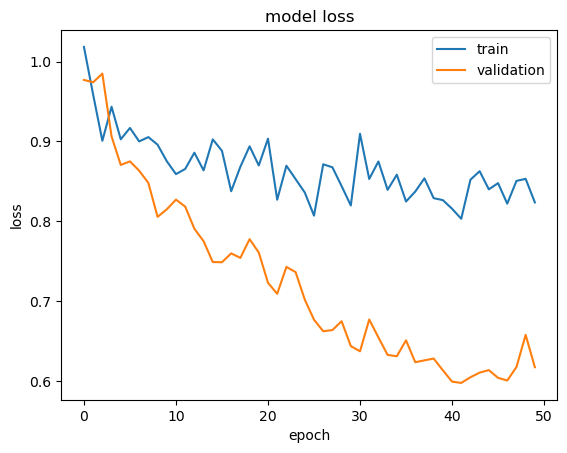

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

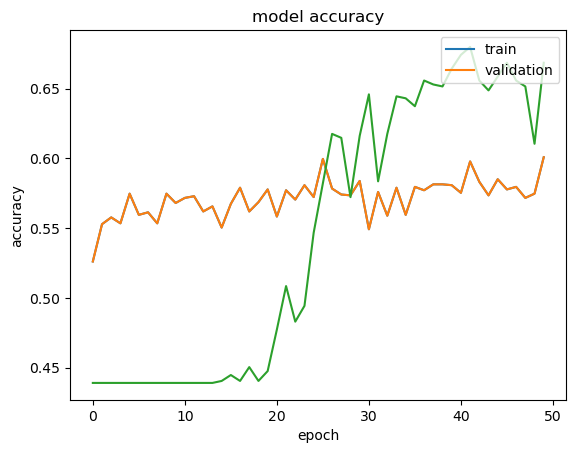

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
# Get predictions and convert them to binary classes (0 or 1)
train_pred = (model.predict(X_train) >= 0.5).astype(int)
valid_pred = (model.predict(X_valid) >= 0.5).astype(int)

print('Training Accuracy: ', accuracy_score(y_train, train_pred))
print('\nValidation Accuracy: ', accuracy_score(y_valid, valid_pred))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training Accuracy:  0.6737545565006076

Validation Accuracy:  0.6685552407932012
